7*sqrt(2)*exp(-t)*sin(sqrt(2)*t) - 4*exp(-t)*cos(sqrt(2)*t)
6*sqrt(2)*exp(-t)*sin(sqrt(2)*t) + 2*exp(-t)*cos(sqrt(2)*t)


(-4.0, 5.0)

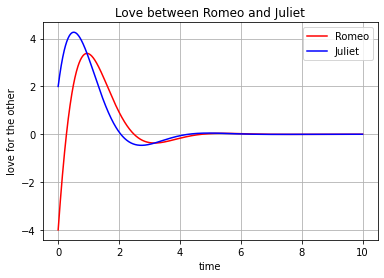

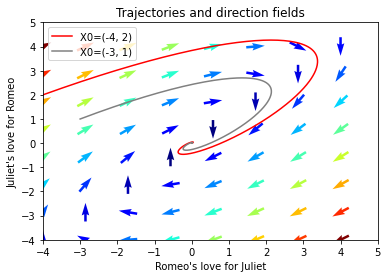

In [24]:
 from sympy import Symbol, Function, Derivative, Eq, dsolve, solve
# a = int(input("a = "))
# b = int(input("b = "))
# c = int(input("c = "))
# d = int(input("d = "))
# r0 = int(input("r0 = "))
# j0 = int(input("j0 = "))
a,b,c,d,r0,j0 = [-3,3,-2,1,-4,2]
t = Symbol('t')
r = Function('r')(t)
j = Function('j')(t)
deq1 = Eq(Derivative(r), a*r + b*j)
deq2 = Eq (Derivative(j), c*r + d*j)
system = (deq1, deq2)
s = dsolve(system)
eq1 = s[0].rhs.subs(t,0) - r0
eq2 = s[1].rhs.subs(t,0) - j0
constants = solve([eq1, eq2])
r = s[0].subs(constants)
j = s[1].subs(constants)
r = r.rhs
j = j.rhs
print(r)
print(j)

##################################################
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import pylab as p

def love(X, t = 0):
    dR = a*X[0]+b*X[1]
    dJ = c*X[0]+d*X[1]
    return [dR ,dJ]

t = np.linspace(0,10,1000)
InitC = [r0,j0]
X = integrate.odeint(love, InitC, t)
Romeo, Juliet = X.T
f1 = p.figure()
p.plot(t, Romeo, 'r-', label='Romeo')
p.plot(t, Juliet  , 'b-', label='Juliet')
p.grid()
p.legend(loc='best')
p.xlabel('time')
p.ylabel('love for the other')
p.title('Love between Romeo and Juliet')


#####################################
#values  = np.linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
#vcolors = p.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories

X0 = [-4,2]                             # starting point
X = integrate.odeint( love, X0, t)         # we don't need infodict here
p.plot( X[:,0], X[:,1], color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

X0 = [-3,1]                             # starting point
X = integrate.odeint( love, X0, t)         # we don't need infodict here
p.plot( X[:,0], X[:,1], color='grey', label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )  
    
#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = 4                       # get axis limits
xmax = 4
nb_points   = 8
ymin = -4
xmin = -4
x = np.linspace(xmin, xmax, nb_points)
y = np.linspace(ymin, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = love([X1, Y1])                      # compute growth rate on the gridt
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Romeo\'s love for Juliet')
p.ylabel('Juliet\'s love for Romeo')
p.legend()
#p.grid()
p.xlim(-4,5, xmax + 0.5)
p.ylim(-4,5, ymax + 0.5)







# 